<h1 style="text-align: center;">Deep Learning<br><br>Clothes Images<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[3].shape

(28, 28)

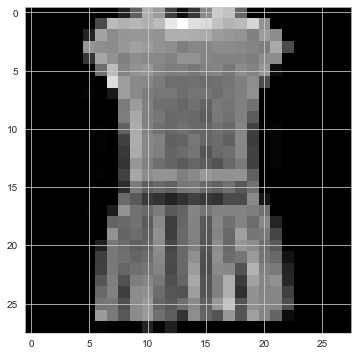

In [9]:
plt.imshow(x_train[3],cmap='gray')

In [10]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  33,  96, 175, 156,  64,
         14,  54, 137, 204, 194, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  73, 186, 177, 183, 175, 188, 232,
        255, 223, 219, 194, 179, 186, 213, 146,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  35, 163, 140, 150, 152, 150, 146, 175,
        175, 173, 171, 156, 152, 148, 129, 156, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 150, 142, 140, 152, 160, 156, 146, 142,
        127, 135, 133, 140, 140, 137, 133, 125, 169,  75,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  54, 167, 146, 129, 142, 137, 137, 131,
        148, 148, 133, 131, 131, 131, 125, 140, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 188, 133, 146, 152, 133, 125,
        127, 119, 129, 133, 119, 140, 131, 150,  14,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_train[3]

3

In [12]:
y_train.shape

(60000,)

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

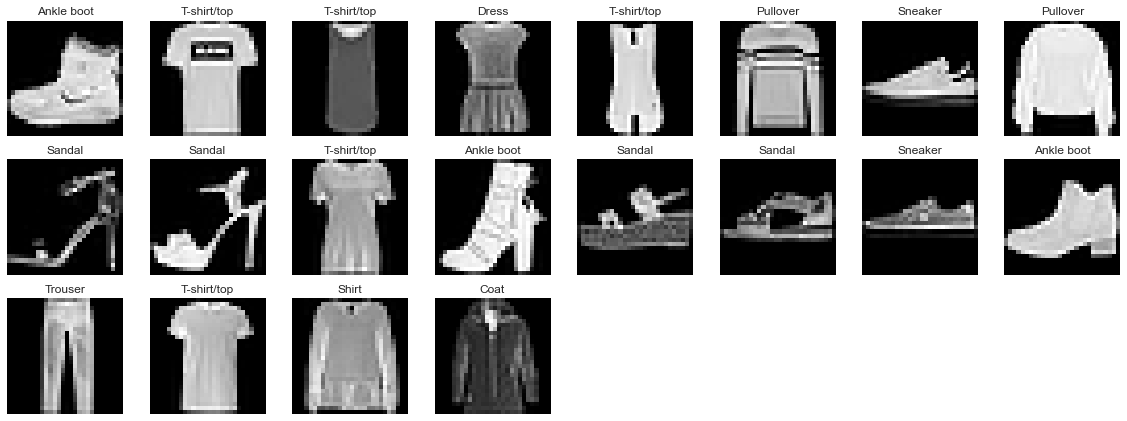

In [16]:
plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[i])])
    plt.imshow(x_train[i], cmap='gray')

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
x_train[3].min()

0

In [18]:
x_train[3].max()

255

In [19]:
# Normalize image pixels

X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[3].min()

0.0

In [21]:
X_train[3].max()

1.0

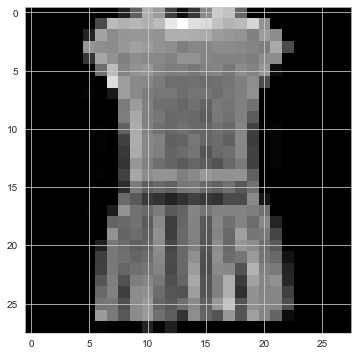

In [22]:
plt.imshow(X_train[3],cmap='gray')

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
X_train = X_train.reshape(X_train.shape[0],28,28, 1) 
X_test = X_test.reshape(X_test.shape[0],28,28, 1)

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
y_train.shape

(60000,)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [30]:
y_train[3]

3

In [31]:
Y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
Y_train[6]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [34]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKerasTF

In [37]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=8, restore_best_weights = True)

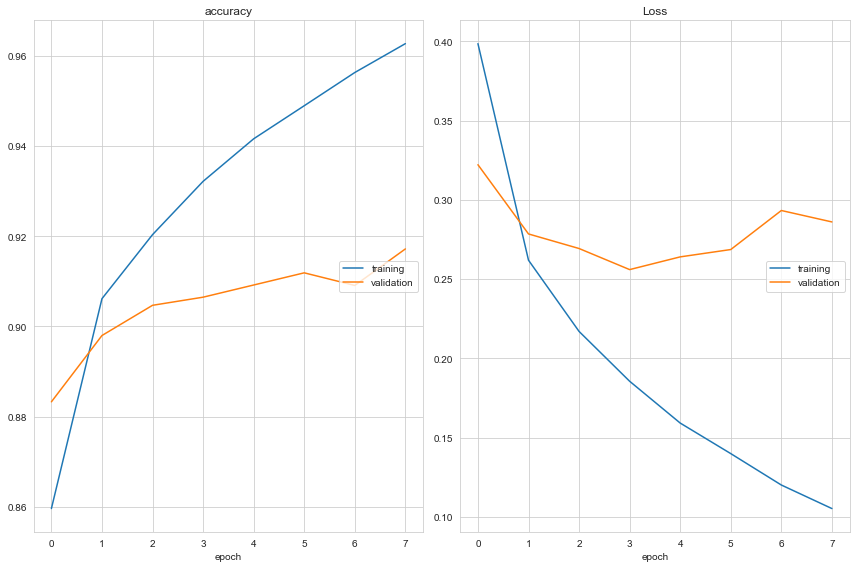

accuracy
	training         	 (min:    0.860, max:    0.963, cur:    0.963)
	validation       	 (min:    0.883, max:    0.917, cur:    0.917)
Loss
	training         	 (min:    0.105, max:    0.399, cur:    0.105)
	validation       	 (min:    0.256, max:    0.322, cur:    0.286)
938/938 [==============================] - 39s 42ms/step - loss: 0.1053 - accuracy: 0.9627 - val_loss: 0.2861 - val_accuracy: 0.9172


In [38]:
model.fit(X_train, Y_train, batch_size=64, epochs=8, validation_data=(X_test,Y_test),verbose=1,
          callbacks=[early_stop , PlotLossesKerasTF()])

**TASK 7: Plot values of metrics you used in your model.**

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.399,0.860,0.322,0.883
1,0.262,0.906,0.278,0.898
2,0.217,0.920,0.269,0.905
3,0.186,0.932,0.256,0.906
4,0.159,0.942,0.264,0.909


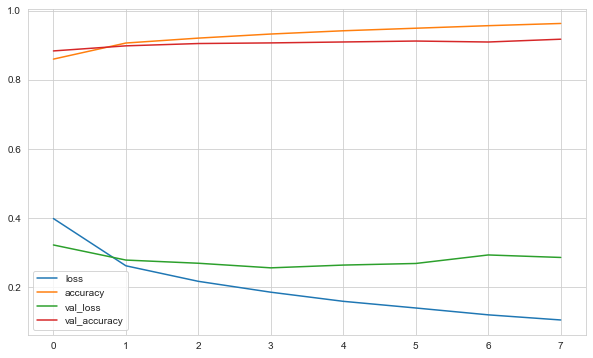

In [41]:
summary.plot();

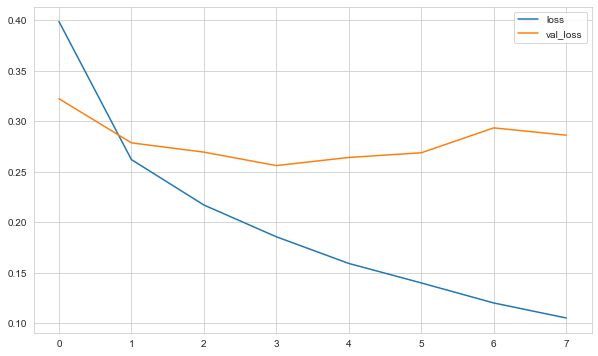

In [42]:
summary[["loss", "val_loss"]].plot();

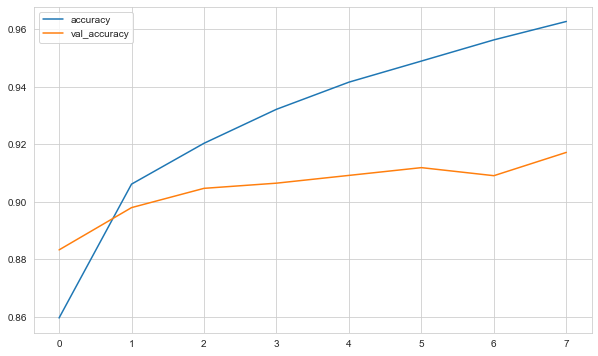

In [43]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [45]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2861 - accuracy: 0.9172


[0.2860659658908844, 0.9172000288963318]

In [46]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2860659658908844
Test accuracy: 0.9172000288963318


In [47]:
model1_loss, model1_acc = model.evaluate(X_test, Y_test, verbose=0)
model1_loss, model1_acc

(0.2860659658908844, 0.9172000288963318)

In [48]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 2s 6ms/step


array([[8.0888178e-08, 4.9899692e-11, 5.0414383e-07, ..., 5.6121353e-05,
        7.4324527e-07, 9.9991047e-01],
       [3.8238028e-08, 1.6957144e-20, 1.0000000e+00, ..., 1.8936377e-16,
        8.2893026e-18, 1.6645936e-18],
       [2.1535223e-08, 1.0000000e+00, 2.5429962e-13, ..., 6.7141723e-15,
        7.9252739e-15, 2.9502152e-16],
       ...,
       [7.9249156e-11, 1.1680124e-13, 6.7784262e-10, ..., 6.6195554e-08,
        9.9999845e-01, 6.6444354e-12],
       [1.1348815e-09, 9.9999928e-01, 1.5219180e-10, ..., 2.6809316e-13,
        3.1184392e-14, 5.6849833e-12],
       [4.2292785e-07, 1.0789885e-08, 8.6498992e-05, ..., 6.9926372e-03,
        8.9097128e-05, 1.7888256e-04]], dtype=float32)

In [49]:
np.argmax(pred_prob[0])

9

In [50]:
pred_prob[0]

array([8.0888178e-08, 4.9899692e-11, 5.0414383e-07, 3.9782083e-10,
       4.5041233e-08, 3.1963900e-05, 8.6830354e-08, 5.6121353e-05,
       7.4324527e-07, 9.9991047e-01], dtype=float32)

In [51]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1000
           1       1.00      0.97      0.98      1000
           2       0.89      0.86      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.81      0.92      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.81      0.71      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [53]:
print(confusion_matrix(y_test, y_pred))

[[894   0  11  17   6   0  67   0   5   0]
 [  2 973   1  15   2   0   6   0   1   0]
 [ 20   0 857   7  76   1  38   0   1   0]
 [ 11   3  10 921  27   0  28   0   0   0]
 [  0   0  34  20 921   1  24   0   0   0]
 [  0   0   0   0   0 987   0   5   0   8]
 [109   0  54  20  98   0 712   0   7   0]
 [  0   0   0   0   0  14   0 971   1  14]
 [  6   0   1   3   2   1   1   1 985   0]
 [  0   0   0   0   0  10   0  37   2 951]]


<AxesSubplot:>

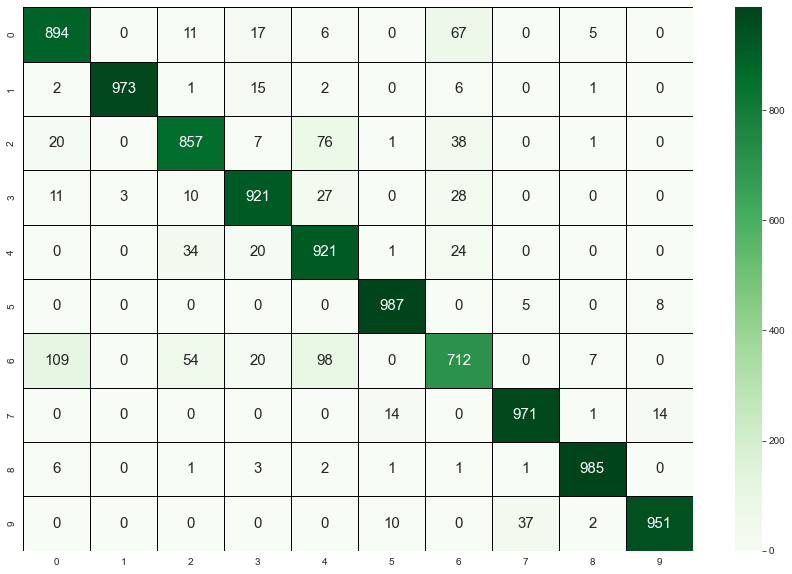

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [55]:
(y_test != y_pred).sum()

828

In [56]:
model1_err_ratio = ((y_test != y_pred).sum() / y_test.sum()) * 100
model1_err_ratio

1.8399999999999999

# Modelling 2 with BN (Batch Normalization)

In [57]:
from tensorflow.keras.layers import BatchNormalization

In [58]:
model = Sequential()

model.add(Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.5))

model.add(Conv2D(56, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.5))

model.add(Conv2D(112, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 28)       112       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 28)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 56)        14168     
                                                                 
 batch_normalization_1 (Batc  (None, 23, 23, 56)      

In [60]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [61]:
model.fit(X_train, Y_train, batch_size=128, epochs=4, validation_data=(X_test,Y_test),
          callbacks=[early_stop])

Epoch 1/4
469/469 [==============================] - 261s 552ms/step - loss: 0.7064 - accuracy: 0.7551 - val_loss: 1.0118 - val_accuracy: 0.6115
Epoch 2/4
469/469 [==============================] - 257s 549ms/step - loss: 0.4321 - accuracy: 0.8520 - val_loss: 0.3461 - val_accuracy: 0.8719
Epoch 3/4
469/469 [==============================] - 363s 774ms/step - loss: 0.3680 - accuracy: 0.8735 - val_loss: 0.3811 - val_accuracy: 0.8615
Epoch 4/4
469/469 [==============================] - 251s 535ms/step - loss: 0.3363 - accuracy: 0.8847 - val_loss: 0.2990 - val_accuracy: 0.8934


In [62]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 8s 26ms/step - loss: 0.2990 - accuracy: 0.8934


[0.29903721809387207, 0.8934000134468079]

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29903721809387207
Test accuracy: 0.8934000134468079


In [64]:
model2_loss, model2_acc = model.evaluate(X_test, Y_test, verbose=0)
model2_loss, model2_acc

(0.29903721809387207, 0.8934000134468079)

In [65]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 9s 27ms/step


array([[1.36592662e-05, 3.10918876e-05, 2.32789098e-05, ...,
        4.38530371e-03, 7.09776723e-05, 9.91783023e-01],
       [5.43340459e-04, 1.25656425e-05, 9.50408340e-01, ...,
        1.07293654e-05, 5.38015083e-05, 9.36851666e-06],
       [2.63763445e-06, 9.99983430e-01, 5.45185628e-07, ...,
        3.63219533e-06, 9.18912122e-07, 1.66231564e-06],
       ...,
       [2.79318647e-06, 5.13809994e-07, 1.37842085e-06, ...,
        2.59667490e-06, 9.99965310e-01, 7.15924989e-06],
       [3.03544653e-06, 9.99969006e-01, 9.57402790e-07, ...,
        3.42077874e-06, 6.94046150e-07, 1.64152516e-06],
       [1.10190012e-04, 2.56368832e-04, 3.13814613e-04, ...,
        1.35206595e-01, 5.27485507e-04, 1.69236131e-03]], dtype=float32)

In [66]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.95      0.69      0.80      1000
           3       0.88      0.93      0.91      1000
           4       0.80      0.85      0.82      1000
           5       0.97      0.99      0.98      1000
           6       0.64      0.81      0.71      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [68]:
print(confusion_matrix(y_test, y_pred))

[[791   1   9  30   3   2 158   0   6   0]
 [  4 975   0  14   3   0   2   0   2   0]
 [ 15   1 694  15 130   0 144   0   1   0]
 [  2   3   5 934  15   0  40   0   1   0]
 [  1   1   3  35 849   0 110   0   1   0]
 [  0   0   0   0   0 989   0  10   0   1]
 [ 74   1  18  31  60   0 807   0   9   0]
 [  0   0   0   0   0  19   0 965   0  16]
 [  2   0   4   5   2   1   5   3 978   0]
 [  0   0   0   0   0   8   0  40   0 952]]


<AxesSubplot:>

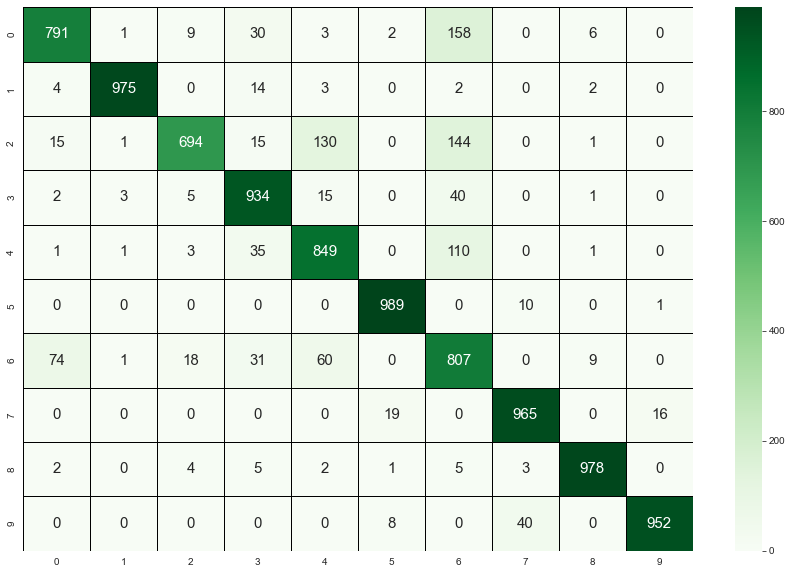

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [70]:
(y_test != y_pred).sum()

1066

In [71]:
model2_err_ratio = ((y_test != y_pred).sum() / y_test.sum()) * 100
model2_err_ratio

2.368888888888889

# Comparing Models

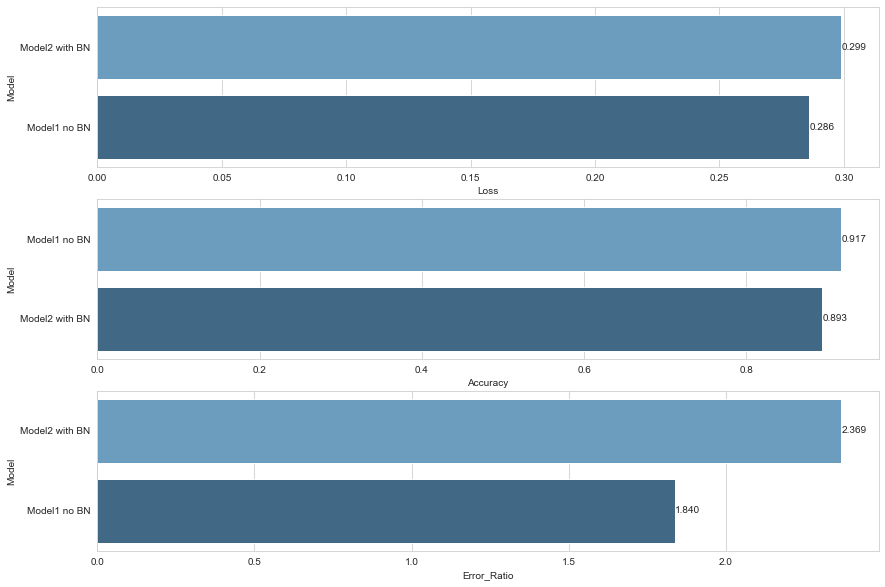

In [72]:
compare = pd.DataFrame({
    "Model": ["Model1 no BN", "Model2 with BN"],
    "Loss": [model1_loss, model2_loss],
    "Accuracy": [model1_acc, model2_acc],
    "Error_Ratio": [model1_err_ratio,model2_err_ratio]
})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="Loss", ascending=False)
ax = sns.barplot(x="Loss", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Error_Ratio", ascending=False)
ax = sns.barplot(x="Error_Ratio", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Final Model

In [73]:
model = Sequential()

model.add(Conv2D(filters=36, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))  
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 36)        360       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 36)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 22500)             0         
                                                                 
 dense_5 (Dense)             (None, 128)               2880128   
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,881,778
Trainable params: 2,881,778
Non-trainable params: 0
____________________________________________

In [75]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=8, restore_best_weights = True)

In [76]:
model.fit(X_train, Y_train, batch_size=96, epochs=8, validation_data=(X_test,Y_test),verbose=1,
          callbacks=[early_stop])

Epoch 1/8
625/625 [==============================] - 40s 63ms/step - loss: 0.3814 - accuracy: 0.8635 - val_loss: 0.2998 - val_accuracy: 0.8942
Epoch 2/8
625/625 [==============================] - 41s 66ms/step - loss: 0.2538 - accuracy: 0.9079 - val_loss: 0.2716 - val_accuracy: 0.9016
Epoch 3/8
625/625 [==============================] - 41s 66ms/step - loss: 0.2070 - accuracy: 0.9239 - val_loss: 0.2540 - val_accuracy: 0.9102
Epoch 4/8
625/625 [==============================] - 41s 66ms/step - loss: 0.1766 - accuracy: 0.9337 - val_loss: 0.2477 - val_accuracy: 0.9115
Epoch 5/8
625/625 [==============================] - 41s 66ms/step - loss: 0.1504 - accuracy: 0.9445 - val_loss: 0.2601 - val_accuracy: 0.9117
Epoch 6/8
625/625 [==============================] - 41s 66ms/step - loss: 0.1276 - accuracy: 0.9533 - val_loss: 0.2491 - val_accuracy: 0.9168
Epoch 7/8
625/625 [==============================] - 42s 67ms/step - loss: 0.1108 - accuracy: 0.9598 - val_loss: 0.2576 - val_accuracy: 0.9194

In [77]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2833 - accuracy: 0.9184


[0.2833271622657776, 0.91839998960495]

In [78]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2833271622657776
Test accuracy: 0.91839998960495


In [79]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 2s 7ms/step


array([[4.46425275e-07, 9.11988540e-11, 3.84388022e-06, ...,
        5.67424286e-04, 4.90741968e-07, 9.99422431e-01],
       [2.88515489e-10, 3.30541724e-18, 1.00000000e+00, ...,
        2.98297814e-15, 1.13884317e-14, 6.26545983e-16],
       [9.58598645e-10, 1.00000000e+00, 1.99314155e-12, ...,
        2.58014073e-18, 4.72661921e-17, 5.29152302e-17],
       ...,
       [7.02364222e-10, 9.39471482e-13, 1.09415865e-09, ...,
        8.50174242e-09, 9.99999642e-01, 4.39648838e-11],
       [9.86857529e-09, 1.00000000e+00, 5.54169555e-09, ...,
        9.65885141e-13, 6.75837749e-13, 5.00009409e-12],
       [5.05675162e-05, 2.59778460e-07, 1.41182833e-03, ...,
        3.36479954e-02, 1.12476904e-04, 5.58407838e-03]], dtype=float32)

In [80]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.91      0.94      0.92      1000
           4       0.82      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.83      0.71      0.77      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [82]:
print(confusion_matrix(y_test, y_pred))

[[872   0  17  19   8   3  77   0   4   0]
 [  1 983   1   8   5   0   1   0   1   0]
 [ 16   1 895   9  53   0  26   0   0   0]
 [  8   2  11 937  25   0  14   0   3   0]
 [  1   0  66  21 893   0  19   0   0   0]
 [  0   0   0   0   0 982   0  11   0   7]
 [ 94   2  58  28 101   0 712   0   5   0]
 [  0   0   0   0   0   2   0 985   0  13]
 [  0   0   3   6   0   5   5   4 976   1]
 [  0   0   1   0   0   6   0  44   0 949]]


<AxesSubplot:>

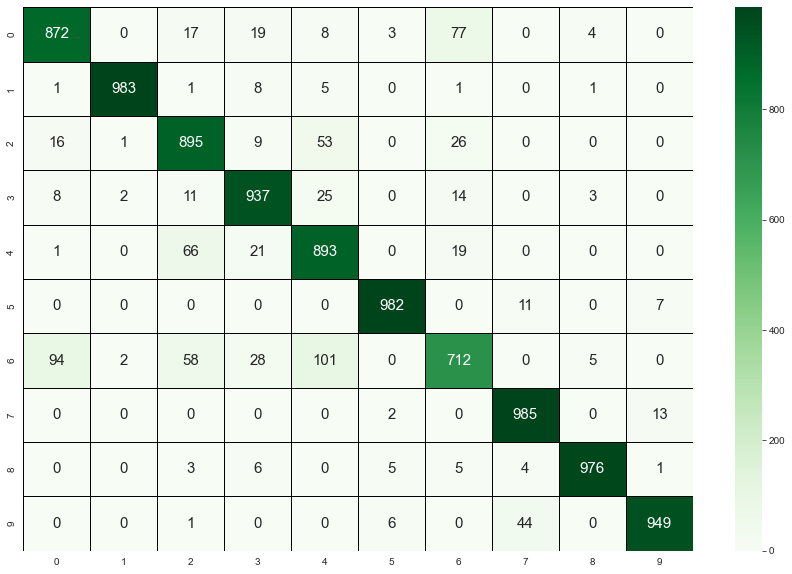

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [84]:
(y_test != y_pred).sum()

816

In [85]:
final_error_ratio = ((y_test != y_pred).sum() / y_test.sum()) * 100
final_error_ratio

1.8133333333333335

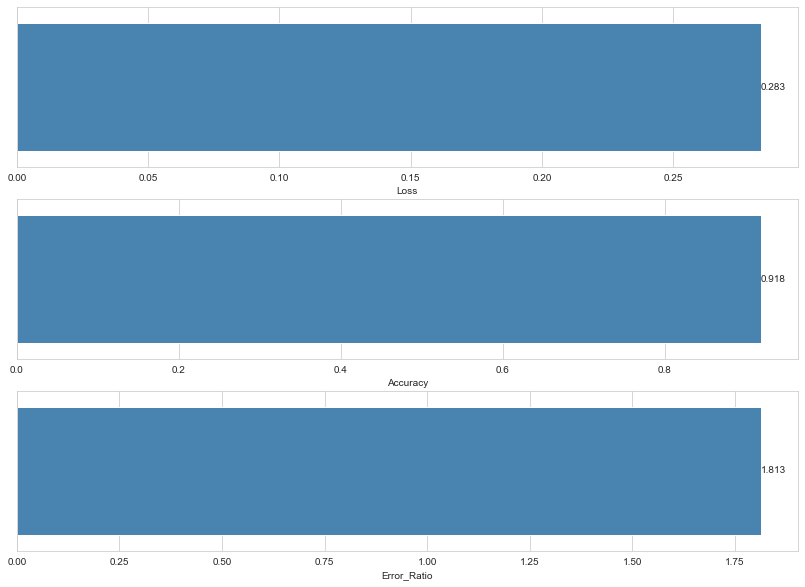

In [99]:
compare = pd.DataFrame({
    "Loss": [score[0]],
    "Accuracy": [score[1]],
    "Error_Ratio": [final_error_ratio]
})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="Loss", ascending=False)
ax = sns.barplot(x="Loss", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax = sns.barplot(x="Accuracy", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Error_Ratio", ascending=False)
ax = sns.barplot(x="Error_Ratio", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [86]:
model.save("cnn-clothes.h5")

## Prediction

In [87]:
model=tf.keras.models.load_model('cnn-clothes.h5')

In [88]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))

1/1 [==============================] - 0s 73ms/step


In [89]:
np.argmax(pred)

1

In [91]:
classes[1]

'Trouser'

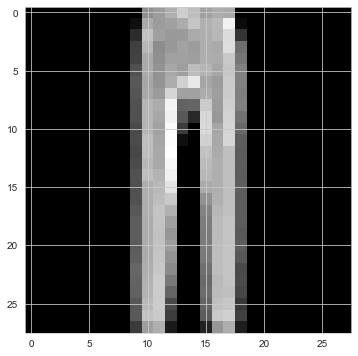

In [100]:
plt.imshow(X_test[24].reshape(28,28), cmap="gray")

# End of Project